<a href="https://colab.research.google.com/github/Mparate1234/Py_stat_DS_ML/blob/main/Adaboost%2CXGboost%2Cgradientboosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model Boosting and Optimization
### Demo 1: Implementing AdaBoost Using Python
## Problem Statement
Recipes of various dishes from different asian cuisines are given. The aim is to classify them
based on the ingredients.


In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Recipes.csv')
data.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [4]:
data.shape


(2448, 384)

In [5]:
data.isna().sum().sum()

0

In [6]:
data.cuisine.unique()

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

In [7]:
target_ratio=pd.DataFrame({'Counts':data.cuisine.value_counts(),'Percentage':data.cuisine.value_counts()/len(data)})
target_ratio

,Counts,Percentage
korean,799,0.326389
indian,598,0.244281
chinese,442,0.180556
japanese,320,0.130719
thai,289,0.118056


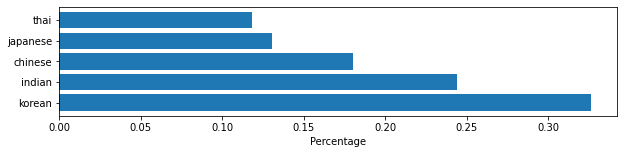

In [8]:
plt.figure(figsize = (10,2))
plt.barh(target_ratio.index, target_ratio.Percentage)
plt.xlabel('Percentage')
plt.show()

In [9]:
lb=LabelEncoder()
data.cuisine=lb.fit_transform(data.cuisine)

In [10]:
lb.classes_

array(['chinese', 'indian', 'japanese', 'korean', 'thai'], dtype=object)

In [11]:
X=data.drop(['cuisine'],axis=1)
y=data.cuisine

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=8,test_size=0.3)

## Training Models

In [12]:
dt_clf=DecisionTreeClassifier(max_depth=1)
dt_clf.fit(X_train,y_train)
dt_pred=dt_clf.predict(X_test)
acc_dt=round(accuracy_score(y_test,dt_pred),3)
print(acc_dt)

0.473


In [13]:
gnb_model=GaussianNB()
gnb_model.fit(X_train,y_train)
gnb_pred=gnb_model.predict(X_test)
acc_gnb=round(accuracy_score(y_test,gnb_pred),3)
print(acc_gnb)

0.565


## AdaBoost
Following parameters should be considered before applying the classifier:
• base_estimator: object Base model/estimator to be used. By default the base 
estimator is DecisionTreeClassifier(max_depth=1)
• n_estimators: int By default value is 50. Used to specify maximum number of 
estimator to be trained to boost the model. If perfect fit occurs then, the learning 
procedure is stopped early.
• learning_rate: float Shrinks the contribution of each estimator by the value 
provided.

In [14]:
ada=AdaBoostClassifier(n_estimators=100,learning_rate=0.6)
ada.fit(X_train,y_train)
ada_pred=ada.predict(X_test)
acc_ada=round(accuracy_score(y_test,ada_pred),3)
print(acc_ada)


0.735


In [15]:
ada_gnb=AdaBoostClassifier(base_estimator=GaussianNB(),n_estimators=70,learning_rate=0.5)
ada_gnb.fit(X_train,y_train)
agnb_pred=ada_gnb.predict(X_test)
acc_agnb=round(accuracy_score(y_test,agnb_pred),3)
print(acc_agnb)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.713


<BarContainer object of 4 artists>

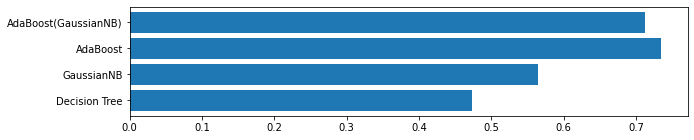

In [16]:
#Visualization

plt.figure(figsize=(10,2))
plt.barh(np.arange(4),[acc_dt,acc_gnb,acc_ada,acc_agnb],\
tick_label=['Decision Tree','GaussianNB','AdaBoost','AdaBoost(GaussianNB)'])


# Model Boosting and Optimization
### Demo 2: Implementing Gradient Boosting Using Python
## Problem Statment
Surverys were conducted on people living in different rural zones. Data was recorded on 
the basis of there lifetyle, assets, income and so on. The aim is to classify either the 
individual is depressed or not.

In [17]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt

In [18]:
data=pd.read_csv('/content/drive/MyDrive/Depressed.csv')
data.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,living_expenses,other_expenses,Salaried,incoming_own_farm,incoming_business,incoming_agricultural,farm_expenses,lasting_investment,no_lasting_investmen,depressed
0,926,91,Male,28,Married,4,10,5,28912201,22861940,...,26692283,28203066,Not Salaried,No,No,30028818,31363432,28411718,28292707.0,No
1,747,57,Male,23,Married,3,8,5,28912201,22861940,...,26692283,28203066,Not Salaried,No,No,30028818,31363432,28411718,28292707.0,Yes
2,1190,115,Male,22,Married,3,9,5,28912201,22861940,...,26692283,28203066,Not Salaried,No,No,30028818,31363432,28411718,28292707.0,No
3,1065,97,Male,27,Married,2,10,4,52667108,19698904,...,397715,44042267,Not Salaried,Yes,No,22288055,18751329,7781123,69219765.0,No
4,806,42,Female,59,Not Married,4,10,6,82606287,17352654,...,80877619,74503502,Salaried,No,No,53384566,20731006,20100562,43419447.0,No


In [19]:
data.shape

(1429, 21)

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   object 
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   object 
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  Salaried               1429 non-null   object 
 14  incoming_own_farm      1429 non-null   object 
 15  inco

In [21]:
data.describe(include='O')

,sex,Married,Salaried,incoming_own_farm,incoming_business,depressed
count,1429,1429,1429,1429,1429,1429
unique,2,2,2,2,2,2
top,Male,Married,Not Salaried,No,No,No
freq,1312,1104,1172,1069,1275,1191


In [22]:
data.describe

<bound method NDFrame.describe of       Survey_id  Ville_id     sex  Age      Married  Number_children  \
0           926        91    Male   28      Married                4   
1           747        57    Male   23      Married                3   
2          1190       115    Male   22      Married                3   
3          1065        97    Male   27      Married                2   
4           806        42  Female   59  Not Married                4   
...         ...       ...     ...  ...          ...              ...   
1424        255        22    Male   25      Married                1   
1425        547        69    Male   28      Married                4   
1426        893       184    Male   66  Not Married                0   
1427        363        75    Male   51      Married                1   
1428        231        12    Male   33  Not Married                4   

      education_level  total_members  gained_asset  durable_asset  ...  \
0                  10      

In [23]:
pd.DataFrame({'Count':data.isnull().sum(),'Percentage':data.isnull().sum()/data.shape[0]})

,Count,Percentage
Survey_id,0,0.000000
Ville_id,0,0.000000
sex,0,0.000000
Age,0,0.000000
Married,0,0.000000
Number_children,0,0.000000
education_level,0,0.000000
total_members,0,0.000000
gained_asset,0,0.000000
durable_asset,0,0.000000


In [24]:
mean=data.no_lasting_investmen.mean()
data.no_lasting_investmen=data.no_lasting_investmen.fillna(mean)

In [25]:
target_ratio=pd.DataFrame({'Counts':data.depressed.value_counts(),'Percentage':data.depressed.value_counts()/len(data)})
target_ratio

,Counts,Percentage
No,1191,0.83345
Yes,238,0.16655


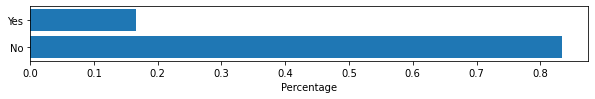

In [26]:
plt.figure(figsize = (10,1))
plt.barh(target_ratio.index, target_ratio.Percentage)
plt.xlabel('Percentage')
plt.show()

In [27]:
lb=LabelEncoder()
data.depressed=lb.fit_transform(data.depressed)
lb.classes_

array(['No', 'Yes'], dtype=object)

In [28]:
scale_cols=['Age','gained_asset', 'durable_asset', 'save_asset',
 'living_expenses', 'other_expenses', 'incoming_agricultural',
 'farm_expenses', 'lasting_investment', 'no_lasting_investmen',]
data[scale_cols]=MinMaxScaler().fit_transform(data[scale_cols])


In [29]:
cols=data.describe(include='O').columns
data[cols]=data[cols].apply(LabelEncoder().fit_transform)


In [30]:
X=data.drop(['depressed','Survey_id','Ville_id'],axis=1)
y=data.depressed


In [31]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=2,test_size=0.3)

## GradientBoostingClassifier
Following parameters should be considered before applying the classifier:
• learning_rate:floatContribution of each tree by default it is 0.1.
• n_estimator:int Number of boosting stages to be performed by default it is 100. 
Large values can be used as Gradient Boosting is fairly robust to over-fitting. For 
other parameters: GradientBoostingClassifier


In [32]:

gb_clf=GradientBoostingClassifier(learning_rate=0.5,n_estimators=1000)
gb_clf.fit(X_train,y_train)
gb_pred=gb_clf.predict(X_test)
print(round(accuracy_score(y_test,gb_pred),3))

0.776


# Model Boosting and Optimization
### Demo 3: Implementing XGBoost Using Python
## Problem Statement
Details of NBA rookies to classify their career longevity more than 5 years or not.

In [33]:
pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


In [35]:
data=pd.read_csv('/content/drive/MyDrive/NBA.csv')
data.head()


,Name,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,...,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
0,Brandon Ingram,36,27.4,7.4,2.6,7.6,34.7,0.5,2.1,25.0,...,2.3,69.9,0.7,3.4,4.1,1.9,0.4,0.4,1.3,0
1,Andrew Harrison,35,26.9,7.2,2.0,6.7,29.6,0.7,2.8,23.5,...,3.4,76.5,0.5,2.0,2.4,3.7,1.1,0.5,1.6,0
2,JaKarr Sampson,74,15.3,5.2,2.0,4.7,42.2,0.4,1.7,24.4,...,1.3,67.0,0.5,1.7,2.2,1.0,0.5,0.3,1.0,0
3,Malik Sealy,58,11.6,5.7,2.3,5.5,42.6,0.1,0.5,22.6,...,1.3,68.9,1.0,0.9,1.9,0.8,0.6,0.1,1.0,1
4,Matt Geiger,48,11.5,4.5,1.6,3.0,52.4,0.0,0.1,0.0,...,1.9,67.4,1.0,1.5,2.5,0.3,0.3,0.4,0.8,1


In [36]:
data.shape

(1340, 21)

In [37]:
data.describe()

,GP,MIN,PTS,FGM,FGA,FG%,3P Made,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,STL,BLK,TOV,TARGET_5Yrs
count,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1329.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,60.414179,17.624627,6.801493,2.629104,5.885299,44.169403,0.247612,0.779179,19.308126,1.297687,1.821940,70.300299,1.009403,2.025746,3.034478,1.550522,0.618507,0.368582,1.193582,0.620149
std,17.433992,8.307964,4.357545,1.683555,3.593488,6.137679,0.383688,1.061847,16.022916,0.987246,1.322984,10.578479,0.777119,1.360008,2.057774,1.471169,0.409759,0.429049,0.722541,0.485531
min,11.000000,3.100000,0.700000,0.300000,0.800000,23.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.300000,0.000000,0.000000,0.000000,0.100000,0.000000
25%,47.000000,10.875000,3.700000,1.400000,3.300000,40.200000,0.000000,0.000000,0.000000,0.600000,0.900000,64.700000,0.400000,1.000000,1.500000,0.600000,0.300000,0.100000,0.700000,0.000000
50%,63.000000,16.100000,5.550000,2.100000,4.800000,44.100000,0.100000,0.300000,22.400000,1.000000,1.500000,71.250000,0.800000,1.700000,2.500000,1.100000,0.500000,0.200000,1.000000,1.000000
75%,77.000000,22.900000,8.800000,3.400000,7.500000,47.900000,0.400000,1.200000,32.500000,1.600000,2.300000,77.600000,1.400000,2.600000,4.000000,2.000000,0.800000,0.500000,1.500000,1.000000
max,82.000000,40.900000,28.200000,10.200000,19.800000,73.700000,2.300000,6.500000,100.000000,7.700000,10.200000,100.000000,5.300000,9.600000,13.900000,10.600000,2.500000,3.900000,4.400000,1.000000


In [38]:
pd.DataFrame({'Count':data.isnull().sum(),'Percentage':data.isnull().sum()/data.shape[0]})

,Count,Percentage
Name,0,0.000000
GP,0,0.000000
MIN,0,0.000000
PTS,0,0.000000
FGM,0,0.000000
FGA,0,0.000000
FG%,0,0.000000
3P Made,0,0.000000
3PA,0,0.000000
3P%,11,0.008209


In [39]:
target_ratio=pd.DataFrame({'Counts':data.TARGET_5Yrs.value_counts(),'Percentage':data.TARGET_5Yrs.value_counts()/len(data)})
target_ratio

,Counts,Percentage
1,831,0.620149
0,509,0.379851


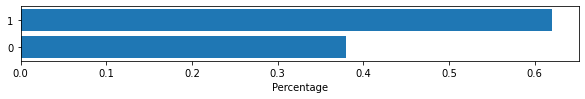

In [40]:
plt.figure(figsize = (10,1))
plt.barh(target_ratio.index, target_ratio.Percentage)
plt.xlabel('Percentage')
plt.show()


In [41]:
X=data.drop(['TARGET_5Yrs','Name'],axis=1)
y=data.TARGET_5Yrs
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=4,test_size=0.3)

## XGBoost Classifier
Further information on XGBoost documentation given below: XGBoost Classifier

In [42]:
xb_clf=XGBClassifier(learning_rate=0.25,n_estimators=100)
xb_clf.fit(X_train,y_train)
xb_pred=xb_clf.predict(X_test)
print(round(accuracy_score(y_test,xb_pred),3))


0.714
